#### This is the sql query to retrieve top 5 countries which was affected by covid
SELECT country_region,sum(n2_17_21)as confirmed FROM "bitdotio/csse_covid_19_data"."time_series_covid19_confirmed_global"
group by country_region having sum(n2_17_21) is not null
order by confirmed desc limit 5

#### This is the sql query to retrieve 3 rd top country of confirmed cases
select * from "bitdotio/csse_covid_19_data"."time_series_covid19_confirmed_global" where country_region='Brazil'

#### This is the sql query to retrieve 3 rd top country of recovered cases¶
select * from "bitdotio/csse_covid_19_data"."time_series_covid19_recovered_global" where country_region='Brazil'

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
confirmed = pd.read_csv('C:\\Users\\Narayanan\\Downloads\\confirmed_global.csv')
recovered = pd.read_csv('C:\\Users\\Narayanan\\Downloads\\recoverd_global.csv')

In [3]:
df= confirmed.append(recovered, ignore_index=True)

In [4]:
df.drop(['country_region','province_state','lat','long'],axis=1,inplace=True)

In [5]:
df.columns

Index(['n1_22_20', 'n1_23_20', 'n1_24_20', 'n1_25_20', 'n1_26_20', 'n1_27_20',
       'n1_28_20', 'n1_29_20', 'n1_30_20', 'n1_31_20',
       ...
       'n2_8_21', 'n2_9_21', 'n2_10_21', 'n2_11_21', 'n2_12_21', 'n2_13_21',
       'n2_14_21', 'n2_15_21', 'n2_16_21', 'n2_17_21'],
      dtype='object', length=393)

In [6]:
df.loc['ratio'] = df.iloc[1]/df.iloc[0]

In [7]:
df

,n1_22_20,n1_23_20,n1_24_20,n1_25_20,n1_26_20,n1_27_20,n1_28_20,n1_29_20,n1_30_20,n1_31_20,...,n2_8_21,n2_9_21,n2_10_21,n2_11_21,n2_12_21,n2_13_21,n2_14_21,n2_15_21,n2_16_21,n2_17_21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.524640e+06,9.599565e+06,9.659167e+06,9.713909e+06,9.765455e+06,9.809754e+06,9.834513e+06,9.866710e+06,9.921981e+06,9.978747e+06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.478818e+06,8.577207e+06,8.616282e+06,8.637050e+06,8.691664e+06,8.740445e+06,8.765048e+06,8.821887e+06,8.847264e+06,8.933402e+06
ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.901983e-01,8.934995e-01,8.920316e-01,8.891426e-01,8.900419e-01,8.909953e-01,8.912539e-01,8.941062e-01,8.916832e-01,8.952429e-01


In [8]:
df.isnull().sum(axis=1)

0         0
1         0
ratio    35
dtype: int64

In [9]:
df=df.dropna(axis=1)

In [10]:
df

,n2_26_20,n2_27_20,n2_28_20,n2_29_20,n3_1_20,n3_2_20,n3_3_20,n3_4_20,n3_5_20,n3_6_20,...,n2_8_21,n2_9_21,n2_10_21,n2_11_21,n2_12_21,n2_13_21,n2_14_21,n2_15_21,n2_16_21,n2_17_21
0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,4.0,13.0,...,9.524640e+06,9.599565e+06,9.659167e+06,9.713909e+06,9.765455e+06,9.809754e+06,9.834513e+06,9.866710e+06,9.921981e+06,9.978747e+06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.478818e+06,8.577207e+06,8.616282e+06,8.637050e+06,8.691664e+06,8.740445e+06,8.765048e+06,8.821887e+06,8.847264e+06,8.933402e+06
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.901983e-01,8.934995e-01,8.920316e-01,8.891426e-01,8.900419e-01,8.909953e-01,8.912539e-01,8.941062e-01,8.916832e-01,8.952429e-01


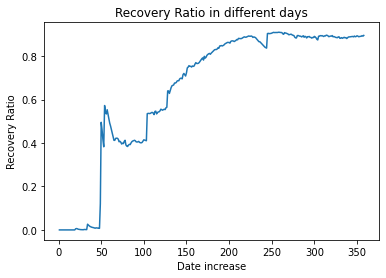

In [11]:
plt.plot(np.arange(1,len(df.columns)+1),df.loc['ratio'])
plt.xlabel('Date increase')
plt.ylabel('Recovery Ratio')
plt.title('Recovery Ratio in different days')
plt.show()

In [12]:
df = df.T

In [13]:
df

,0,1,ratio
n2_26_20,1.0,0.0,0.000000
n2_27_20,1.0,0.0,0.000000
n2_28_20,1.0,0.0,0.000000
n2_29_20,2.0,0.0,0.000000
n3_1_20,2.0,0.0,0.000000
...,...,...,...
n2_13_21,9809754.0,8740445.0,0.890995
n2_14_21,9834513.0,8765048.0,0.891254
n2_15_21,9866710.0,8821887.0,0.894106
n2_16_21,9921981.0,8847264.0,0.891683


In [14]:
df.reset_index(level=0, inplace=True)

In [15]:
df['index'] = df['index'].map(lambda x: x.lstrip('n'))

In [16]:
df

,index,0,1,ratio
0,2_26_20,1.0,0.0,0.000000
1,2_27_20,1.0,0.0,0.000000
2,2_28_20,1.0,0.0,0.000000
3,2_29_20,2.0,0.0,0.000000
4,3_1_20,2.0,0.0,0.000000
...,...,...,...,...
353,2_13_21,9809754.0,8740445.0,0.890995
354,2_14_21,9834513.0,8765048.0,0.891254
355,2_15_21,9866710.0,8821887.0,0.894106
356,2_16_21,9921981.0,8847264.0,0.891683


In [17]:
df['index']=pd.to_datetime(df['index'],format="%m_%d_%y")

In [18]:
df1=df[['index','ratio']]

In [19]:
df1.set_index('index',inplace=True)

In [20]:
df1

,ratio
index,
2020-02-26,0.000000
2020-02-27,0.000000
2020-02-28,0.000000
2020-02-29,0.000000
2020-03-01,0.000000
...,...
2021-02-13,0.890995
2021-02-14,0.891254
2021-02-15,0.894106


In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
df1=df1.dropna()

In [23]:
test_result=adfuller(df1['ratio'])

In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(ratio):
    result=adfuller(ratio)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [25]:
adfuller_test(df1['ratio'])

ADF Test Statistic : -2.3082317590788035
p-value : 0.1693268087114363
#Lags Used : 11
Number of Observations Used : 346
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
df1['ratio First Difference'] = df1['ratio'] - df1['ratio'].shift(1)

In [27]:
df1

,ratio,ratio First Difference
index,,
2020-02-26,0.000000,NaN
2020-02-27,0.000000,0.000000
2020-02-28,0.000000,0.000000
2020-02-29,0.000000,0.000000
2020-03-01,0.000000,0.000000
...,...,...
2021-02-13,0.890995,0.000953
2021-02-14,0.891254,0.000259
2021-02-15,0.894106,0.002852


In [28]:
adfuller_test(df1['ratio First Difference'].dropna())

ADF Test Statistic : -6.408023329481739
p-value : 1.921569342269522e-08
#Lags Used : 7
Number of Observations Used : 349
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='index'>

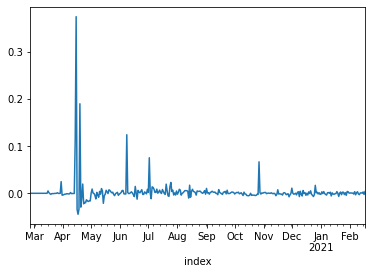

In [29]:
df1['ratio First Difference'].plot()

In [30]:
import statsmodels.api as sm

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

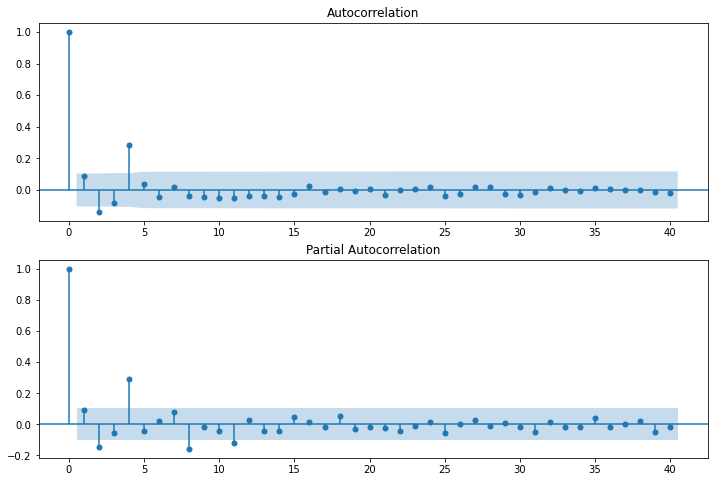

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['ratio First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['ratio First Difference'].dropna(),lags=40,ax=ax2)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model=sm.tsa.statespace.SARIMAX(df1['ratio'],order=(1, 1, 1))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  ratio   No. Observations:                  358
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 807.179
Date:                Wed, 08 Dec 2021   AIC                          -1608.359
Time:                        15:05:00   BIC                          -1596.726
Sample:                    02-26-2020   HQIC                         -1603.732
                         - 02-17-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1454      0.302     -0.482      0.630      -0.737       0.446
ma.L1          0.2681      0.302      0.886      0.375      -0.325       0.861
sigma2         0.0006   8.44e-06     75.315      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):            241938.02
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             9.92
Prob(H) (two-sided):                  0.00   Kurtosis:                       128.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='index'>

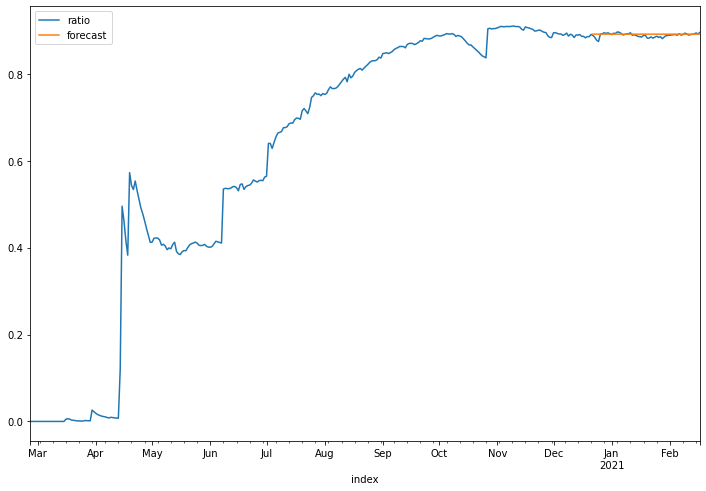

In [36]:
df1['forecast']=results.predict(start=300,end=358,dynamic=True)
df1[['ratio', 'forecast']].plot(figsize=(12, 8)) 

In [37]:
from pandas.tseries.offsets import DateOffset

In [38]:
future_dates=[df1.index[-1]+ DateOffset(days=x)for x in range(0,180)]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [40]:
future_datest_df.head()

,ratio,ratio First Difference,forecast
2021-02-18,NaN,NaN,NaN
2021-02-19,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN
2021-02-21,NaN,NaN,NaN
2021-02-22,NaN,NaN,NaN


In [41]:
future_df=pd.concat([df,future_datest_df])

In [42]:
future_df['forecast'] = results.predict(start = 358, end = 523, dynamic= True)  

<AxesSubplot:>

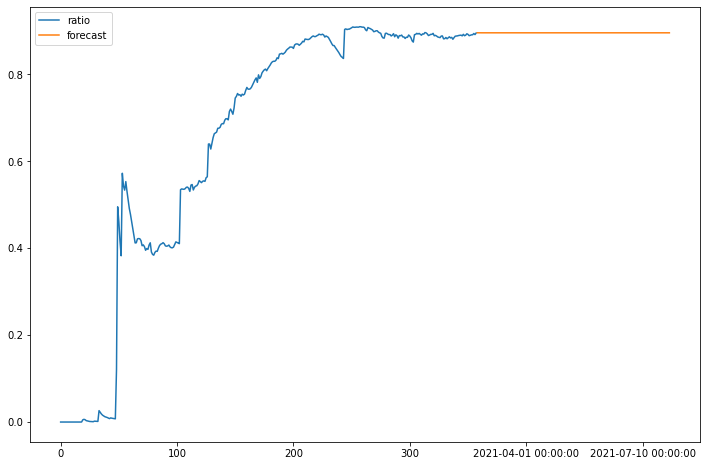

In [43]:
future_df[['ratio', 'forecast']].plot(figsize=(12, 8)) 


This is the Forecasting for covid prediction for next 6 months in brazil. The p, d,q value was calculated by the acf and pacf graph. the prediction could be done better if the seasonal forecast is calculated. 

# Forecast using anticipy

In [44]:
from anticipy import forecast, forecast_models, forecast_plot

In [45]:
df1

,ratio,ratio First Difference,forecast
index,,,
2020-02-26,0.000000,NaN,NaN
2020-02-27,0.000000,0.000000,NaN
2020-02-28,0.000000,0.000000,NaN
2020-02-29,0.000000,0.000000,NaN
2020-03-01,0.000000,0.000000,NaN
...,...,...,...
2021-02-13,0.890995,0.000953,0.891258
2021-02-14,0.891254,0.000259,0.891258
2021-02-15,0.894106,0.002852,0.891258


In [46]:
df1 = pd.DataFrame({'y': df1['ratio'],'date':df1.index})

In [47]:
df_forecast = forecast.run_forecast(df1, extrapolate_years=0.5)
print(df_forecast.tail(3))

          date source  is_actuals        model         y        q5       q95  \
888 2021-08-16    src       False  snaive_wday  0.894106  0.836225  1.304239   
889 2021-08-17    src       False  snaive_wday  0.891683  0.828494  1.301303   
890 2021-08-18    src       False  snaive_wday  0.895243  0.838485  0.996827   

          q20       q80  
888  0.854374  0.918085  
889  0.848553  0.900619  
890  0.853932  0.903575  


In [48]:
dict_result = forecast.run_forecast(df1, extrapolate_years=0.5,simplify_output=False, include_all_fits=True)
# Table with actuals and forecast for best-fitting model, including prediction intervals
print (dict_result['forecast'].groupby('model').tail(1))


          date source  is_actuals        model         y        q5       q95  \
357 2021-02-17    src        True      actuals  0.895243       NaN       NaN   
890 2021-08-18    src       False  snaive_wday  0.895243  0.834931  0.992201   

          q20       q80  
357       NaN       NaN  
890  0.854263  0.911187  


In [49]:
# Table including time series actuals and forecast
print (dict_result['data'].groupby('model').tail(1))



           date  weight         y                 model source  \
357  2021-02-17     1.0  0.895243               actuals    src   
897  2021-08-18     1.0  1.595495  (linear+season_wday)    src   
1437 2021-08-18     1.0  1.593051                linear    src   
1970 2021-08-18     1.0  0.895243           snaive_wday    src   

                           source_long  is_actuals  is_best_fit  
357     src:1:D:2020-02-26::2021-02-17        True        False  
897   src:1-1:D:2020-02-26::2021-02-17       False        False  
1437  src:1-1:D:2020-02-26::2021-02-17       False        False  
1970  src:1-1:D:2020-02-26::2021-02-17       False         True  


In [50]:
# Metadata table: model parameters and fitting output
print (dict_result['metadata'])

  source                 model weights         actuals_x_range freq  is_fit  \
0    src  (linear+season_wday)       1  2020-02-26::2021-02-17    D    True   
1    src                linear       1  2020-02-26::2021-02-17    D    True   
2    src           snaive_wday       1  2020-02-26::2021-02-17    D    True   

       cost        aic_c  fit_time                                 params_str  \
0  3.720695 -1618.438226  0.001994  [ 0.   0.2  0.   0.   0.  -0.  -0.  -0. ]   
1  3.721681 -1630.722188  0.001994                                  [0.  0.2]   
2  0.950685 -2123.335915  0.027925                                         []   

  status                       source_long  \
0    FIT  src:1-1:D:2020-02-26::2021-02-17   
1    FIT  src:1-1:D:2020-02-26::2021-02-17   
2    FIT  src:1-1:D:2020-02-26::2021-02-17   

                                              params             model_obj  \
0  [0.0026156711631558183, 0.17767152187940144, 0...  (linear+season_wday)   
1       [0.002615

In [51]:
# Table with output data from scipy.optimize, for debugging purposes
print(dict_result['optimize_info'])

  source                 model  success  \
0    src  (linear+season_wday)     True   
1    src                linear     True   
2    src           snaive_wday     True   

                                  params_str      cost    optimality  \
0  [ 0.   0.2  0.   0.   0.  -0.  -0.  -0. ]  3.720695  3.748113e-12   
1                                  [0.  0.2]  3.721681  4.934719e-12   
2                                         []  0.950685  0.000000e+00   

   iterations  status  jac_evals                                     message  \
0         2.0       1        2.0  `gtol` termination condition is satisfied.   
1         2.0       1        2.0  `gtol` termination condition is satisfied.   
2         0.0       0        0.0                          Naive model fitted   

                        source_long  \
0  src:1-1:D:2020-02-26::2021-02-17   
1  src:1-1:D:2020-02-26::2021-02-17   
2  src:1-1:D:2020-02-26::2021-02-17   

                                              params  
0  [0

In [52]:
path_tutorial_plot = 'plot'
# Save plot as a file
forecast_plot.plot_forecast(df_forecast, output='html',
path=path_tutorial_plot, width=350, height=240, title='Forecast')
# Show plot in a jupyter notebook
forecast_plot.plot_forecast(df_forecast, output='jupyter', width=350,
height=240, title='covid prediction in brazil')